In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
import re


In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df=pd.read_csv('Steam reviews.csv')

In [4]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


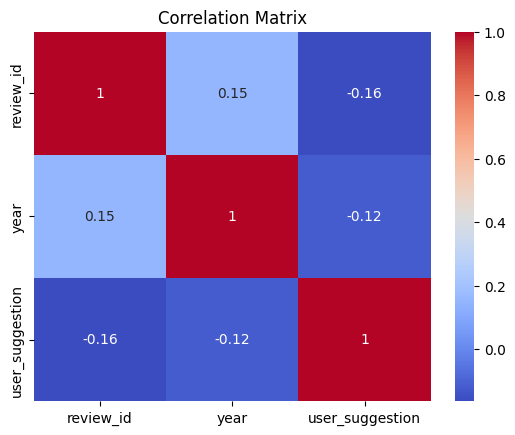

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **EDA**

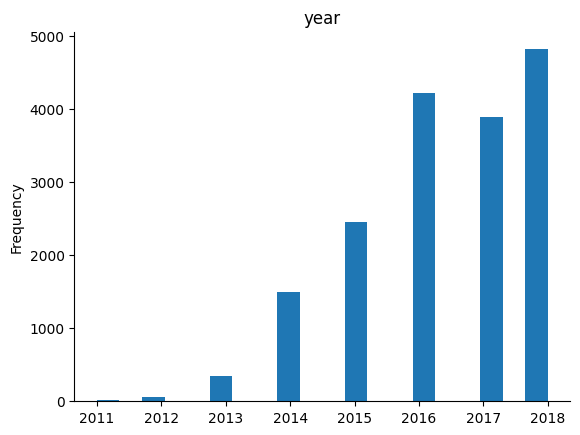

In [7]:
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df['user_suggestion'].value_counts()

,count
user_suggestion,
1,9968
0,7526


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [10]:
df.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [11]:
print(df.describe(include=['object']))

            title user_review
count       17494       17494
unique         44       17490
top     Robocraft      #NAME?
freq          842           5


In [12]:
!pip install ydata-profiling
!pip install pydantic-settings

from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv('Steam reviews.csv')
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file('report.html')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d3e1adcea7ace667d88da7f4fc390fcc74d0370cd950e02b5d82ea8bb419b498
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile

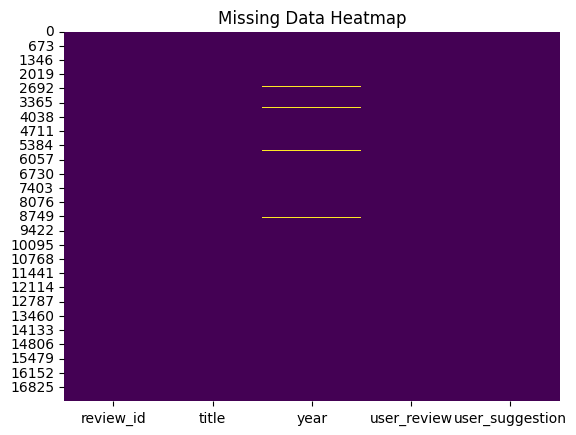

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [15]:
print(df.columns)  # Print the names of columns in your DataFrame


Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion'], dtype='object')


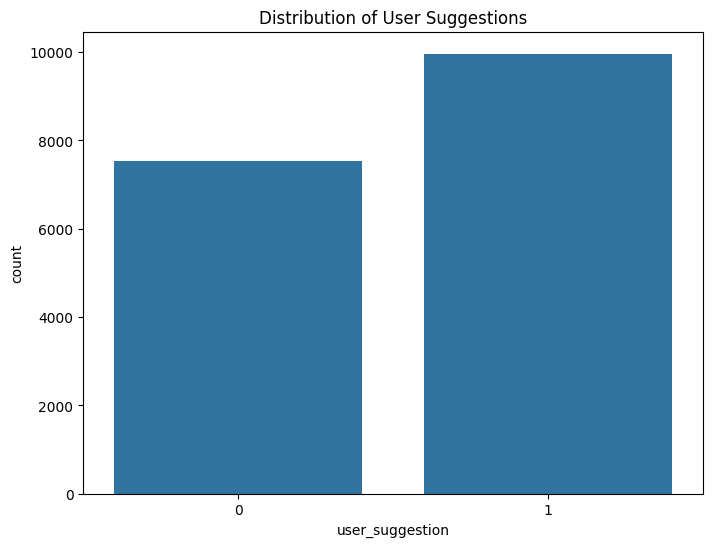

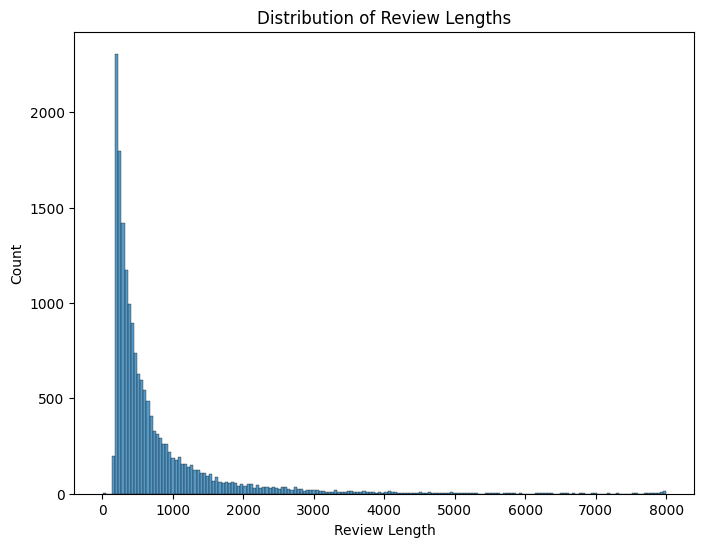

In [16]:
# Get the shape of the dataset
#print("Shape of the dataset:", df.shape)

# Check the data types of the columns
#print("Data types of the columns:\n", df.dtypes)

# Check for missing values
#print("Missing values:\n", df.isnull().sum())

# Examine the distribution of the 'user_suggestion' column
plt.figure(figsize=(8, 6))
sns.countplot(x='user_suggestion', data=df)
plt.title('Distribution of User Suggestions')
plt.show()

# Analyze the length of the 'user_review' text
df['review_length'] = df['user_review'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'])
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [17]:
import plotly.graph_objects as go
import pandas as pd # Import pandas for data manipulation

# Assuming 'df' is your DataFrame
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

fig = go.Figure(data=go.Heatmap(
                   z=numerical_df.corr().values,
                   x=numerical_df.columns,
                   y=numerical_df.columns,
                   colorscale='Viridis'))

fig.update_layout(title='Correlation Heatmap')
fig.show()

In [18]:
#in our data set there is 44 games.
df['title'].value_counts().count()

44

Average review length by sentiment:
 user_suggestion
0    800.810922
1    730.775682
Name: review_length, dtype: float64


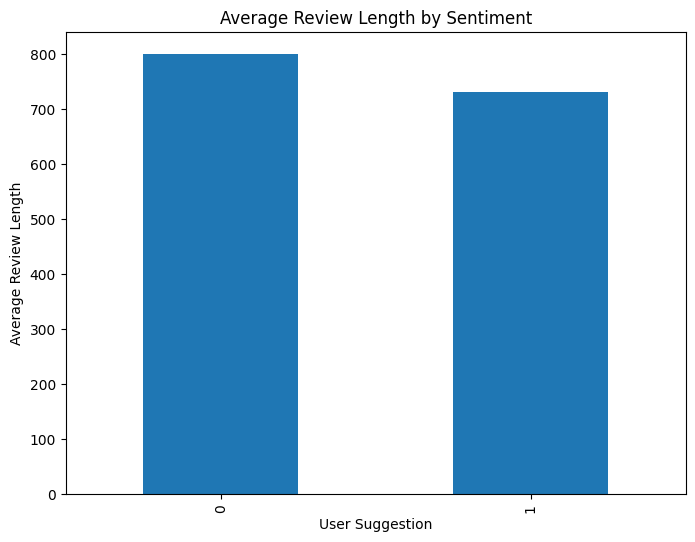

In [19]:
# Group the data by 'user_suggestion' and calculate the mean review length
review_length_by_sentiment = df.groupby('user_suggestion')['review_length'].mean()
print("Average review length by sentiment:\n", review_length_by_sentiment)

# Visualize the relationship
plt.figure(figsize=(8, 6))
review_length_by_sentiment.plot(kind='bar')
plt.title('Average Review Length by Sentiment')
plt.xlabel('User Suggestion')
plt.ylabel('Average Review Length')
plt.show()

NLP

In [20]:
text=df['user_review']

In [21]:
# Extract the year from the 'year' column
df['year'] = pd.to_numeric(df['year'])

# Calculate the word count of the reviews
df['word_count'] = df['user_review'].str.split().str.len()

# Calculate the unique word count of the reviews
df['unique_word_count'] = df['user_review'].str.split().apply(lambda x: len(set(x)))

# Calculate the ratio of unique words to total words
df['unique_word_ratio'] = df['unique_word_count'] / df['word_count']

In [22]:
text

,user_review
0,I'm scared and hearing creepy voices. So I'll...
1,"Best game, more better than Sam Pepper's YouTu..."
2,"A littly iffy on the controls, but once you kn..."
3,"Great game, fun and colorful and all that.A si..."
4,Not many games have the cute tag right next to...
...,...
17489,Arguably the single greatest mmorp that exists...
17490,"An older game, to be sure, but has its own cha..."
17491,When I frist started playing Everquest 2 it wa...
17492,cool game. THe only thing that REALLY PISSES M...


In [23]:
# we wrote Function to clean up the text while preserving spaces
def clean_text(text):
    if isinstance(text, str):
        #remove any non-alphanumeric characters while preserving spaces
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        return cleaned_text
    else:
        return str(text)

df['cleaned_text'] = df['user_review'].apply(clean_text)

df


,review_id,title,year,user_review,user_suggestion,review_length,word_count,unique_word_count,unique_word_ratio,cleaned_text
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710,132,103,0.780303,Im scared and hearing creepy voices So Ill pa...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335,44,41,0.931818,Best game more better than Sam Peppers YouTube...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397,70,58,0.828571,A littly iffy on the controls but once you kno...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280,47,45,0.957447,Great game fun and colorful and all thatA side...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334,67,51,0.761194,Not many games have the cute tag right next to...
...,...,...,...,...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,984,175,124,0.708571,Arguably the single greatest mmorp that exists...
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,1472,269,178,0.661710,An older game to be sure but has its own charm...
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,1642,312,193,0.618590,When I frist started playing Everquest 2 it wa...
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,264,46,38,0.826087,cool game THe only thing that REALLY PISSES ME...


In [24]:
#removing stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    if isinstance(text, str):
        # Tokenize
        words = word_tokenize(text)
        # Remove stopwords
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return filtered_words
    else:
        return str(text)

df['cleaned_text1'] = df['cleaned_text'].apply(remove_stopwords)
df


,review_id,title,year,user_review,user_suggestion,review_length,word_count,unique_word_count,unique_word_ratio,cleaned_text,cleaned_text1
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710,132,103,0.780303,Im scared and hearing creepy voices So Ill pa...,"[Im, scared, hearing, creepy, voices, Ill, pau..."
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335,44,41,0.931818,Best game more better than Sam Peppers YouTube...,"[Best, game, better, Sam, Peppers, YouTube, ac..."
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397,70,58,0.828571,A littly iffy on the controls but once you kno...,"[littly, iffy, controls, know, play, easy, mas..."
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280,47,45,0.957447,Great game fun and colorful and all thatA side...,"[Great, game, fun, colorful, thatA, side, note..."
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334,67,51,0.761194,Not many games have the cute tag right next to...,"[many, games, cute, tag, right, next, horror, ..."
...,...,...,...,...,...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,984,175,124,0.708571,Arguably the single greatest mmorp that exists...,"[Arguably, single, greatest, mmorp, exists, to..."
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,1472,269,178,0.661710,An older game to be sure but has its own charm...,"[older, game, sure, charm, holds, special, pla..."
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,1642,312,193,0.618590,When I frist started playing Everquest 2 it wa...,"[frist, started, playing, Everquest, 2, amazin..."
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,264,46,38,0.826087,cool game THe only thing that REALLY PISSES ME...,"[cool, game, thing, REALLY, PISSES, ridable, t..."


In [25]:
print(df['user_suggestion'].sum())
# Assuming 'user_suggestion' column contains numerical values

9968


In [26]:
#ranking
def map_to_sentiment(value):
    return 'positive' if value == 1 else 'negative'

# Apply the mapping function





def analyze_sentiment(text):
    # Join the list of words back into a single string if it's a list
    if isinstance(text, list):
        text = ' '.join(text)

    # Initialize the sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Analyze sentiment
    sentiment_scores = sid.polarity_scores(text)


    if 'just kidding' in text.lower():
      return 'neutral'
    # Determine the overall sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.1:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.1:
        return 'negative'
    else:
        return 'neutral'

# Move this line before applying analyze_sentiment
# df['cleaned_text1'] = df['cleaned_text1'].apply(lambda x: ' '.join(x))

df['sentiment'] = df['cleaned_text1'].apply(analyze_sentiment)

# Now you can join the words for other purposes if needed
df['cleaned_text1'] = df['cleaned_text1'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [27]:
df1 = df[["cleaned_text1","sentiment"]]
df1["sentiment"].value_counts()

,count
sentiment,
positive,13187
negative,3559
neutral,748


In [28]:
df1

,cleaned_text1,sentiment
0,Im scared hearing creepy voices Ill pause mome...,negative
1,Best game better Sam Peppers YouTube account 1...,positive
2,littly iffy controls know play easy master Ive...,positive
3,Great game fun colorful thatA side note though...,positive
4,many games cute tag right next horror tag Stea...,positive
...,...,...
17489,Arguably single greatest mmorp exists today fr...,positive
17490,older game sure charm holds special place hear...,positive
17491,frist started playing Everquest 2 amazing stil...,positive
17492,cool game thing REALLY PISSES ridable transpor...,negative


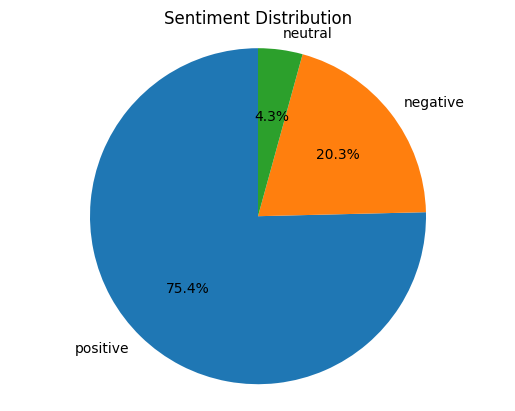

In [29]:
# @title Sentiment Distribution

import matplotlib.pyplot as plt

sentiment_counts = df1['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
_ = plt.axis('equal')

In [30]:
total_nulls = df1.isnull().sum().sum()

print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 0


In [31]:
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [32]:
total_nulls = df.isnull().sum().sum()

print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 0


### **Modeling**

### **MNB**

In [33]:

X = df1['cleaned_text1']
y = df1['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.68      0.22      0.33       672
     neutral       0.43      0.02      0.04       151
    positive       0.80      0.98      0.88      2676

    accuracy                           0.79      3499
   macro avg       0.64      0.41      0.42      3499
weighted avg       0.76      0.79      0.74      3499



In [34]:
x15 = ['bad']
word= vectorizer.transform(x15)
y_pred1 = clf.predict(word)
y_pred1

array(['positive'], dtype='<U8')

In [35]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have already trained and fitted your classifier (clf) with X_train_counts and y_train
# X_train_counts and X_test_counts should be vectors of word counts (e.g., obtained using CountVectorizer)
# y_pred contains the predicted labels from your classifier

# Create the main Tkinter window
root = tk.Tk()
root.title("Sentiment Analysis")

# Function to perform sentiment analysis when the button is clicked
def analyze():
    text = text_entry.get("1.0", "end-1c")  # Get text from text entry widget
    if text.strip():  # Check if text is not empty
        # Transform the input text using the same vectorizer used for training
        text_vectorized = vectorizer.transform([text])
        # Predict sentiment using the trained classifier
        sentiment = clf.predict(text_vectorized)[0]
        messagebox.showinfo("Sentiment Analysis Result", f"The sentiment is: {sentiment}")
    else:
        messagebox.showwarning("Warning", "Please enter text to analyze")

# Create text entry widget
text_entry = tk.Text(root, height=10, width=40)
text_entry.pack()

# Create analyze button
analyze_button = tk.Button(root, text="Analyze", command=analyze)
analyze_button.pack()

# Run the Tkinter event loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Vectorize X_train and X_test (if not already done)
vectorizer = CountVectorizer()  # Or TfidfVectorizer for TF-IDF
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Tune Multinomial Naive Bayes
param_grid_mnb = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5)

# Fit the model with the vectorized data
grid_search_mnb.fit(X_train_vec, y_train)  # Use X_train_vec instead of X_train

print("Best Multinomial Naive Bayes parameters:", grid_search_mnb.best_params_)



Best Multinomial Naive Bayes parameters: {'alpha': 1.0}


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Multinomial Naive Bayes
mnb_best = grid_search_mnb.best_estimator_

# Transform X_test using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)  # Vectorize X_test before prediction

y_pred_mnb = mnb_best.predict(X_test_vec) # Predict on vectorized data
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Precision:", precision_score(y_test, y_pred_mnb, average='macro')) # Change average to 'macro'
print("Recall:", recall_score(y_test, y_pred_mnb, average='macro')) # Change average to 'macro'
print("F1-score:", f1_score(y_test, y_pred_mnb, average='macro')) # Change average to 'macro'

Multinomial Naive Bayes:
Accuracy: 0.7936553300943127
Precision: 0.636515827069144
Recall: 0.40714034700685725
F1-score: 0.4177493429458257


## **LSTM Model**

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Parameters
max_words = 5000  # Max number of words to use
max_len = 100  # Max length of each sequence
embedding_dim = 100  # Embedding dimensions

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=max_len)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['user_suggestion'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM Model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 111s 485ms/step - accuracy: 0.6707 - loss: 0.5911 - val_accuracy: 0.8274 - val_loss: 0.3973
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 141s 482ms/step - accuracy: 0.8534 - loss: 0.3440 - val_accuracy: 0.8294 - val_loss: 0.3762
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 108s 494ms/step - accuracy: 0.8928 - loss: 0.2657 - val_accuracy: 0.8280 - val_loss: 0.3809
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 140s 483ms/step - accuracy: 0.9156 - loss: 0.2132 - val_accuracy: 0.8377 - val_loss: 0.3811
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 489ms/step - accuracy: 0.9339 - loss: 0.1709 - val_accuracy: 0.8262 - val_loss: 0.4612
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1473
           1       0.85      0.85      0.85      2026

    accuracy                           0.83      3499
   macro avg       0.82      0.82      0.82      3499
weighted avg       0.83      

In [50]:
# Now try evaluating the model again

model.evaluate(X_test, y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.9613 - loss: 0.1265


[0.1261214017868042, 0.960845947265625]

In [39]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [40]:
import keras_tuner as kt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Parameters
max_words = 5000
max_len = 100

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=max_len)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['user_suggestion'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model-building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(max_words, hp.Int('embedding_dim', 50, 200, step=50), input_length=max_len))
    model.add(LSTM(hp.Int('lstm_units', 64, 256, step=64), return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(LSTM(hp.Int('lstm_units', 64, 256, step=64)))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Run the tuner
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


Trial 2 Complete [00h 12m 31s]
val_accuracy: 0.8415261507034302

Best val_accuracy So Far: 0.8418119549751282
Total elapsed time: 00h 35m 18s
Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 115s 508ms/step - accuracy: 0.6651 - loss: 0.6054 - val_accuracy: 0.8248 - val_loss: 0.4159
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 110s 500ms/step - accuracy: 0.8552 - loss: 0.3464 - val_accuracy: 0.8494 - val_loss: 0.3724
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 108s 492ms/step - accuracy: 0.8882 - loss: 0.2780 - val_accuracy: 0.8382 - val_loss: 0.4181
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 106s 486ms/step - accuracy: 0.9245 - loss: 0.2035 - val_accuracy: 0.8382 - val_loss: 0.4304
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 492ms/step - accuracy: 0.9426 - loss: 0.1566 - val_accuracy: 0.8277 - val_loss: 0.4590
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1473
           1       0.85      0.85      0.85      2

In [41]:
# Now try evaluating the model again

model.evaluate(X_test, y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.8180 - loss: 0.4825


[0.46116653084754944, 0.8262360692024231]

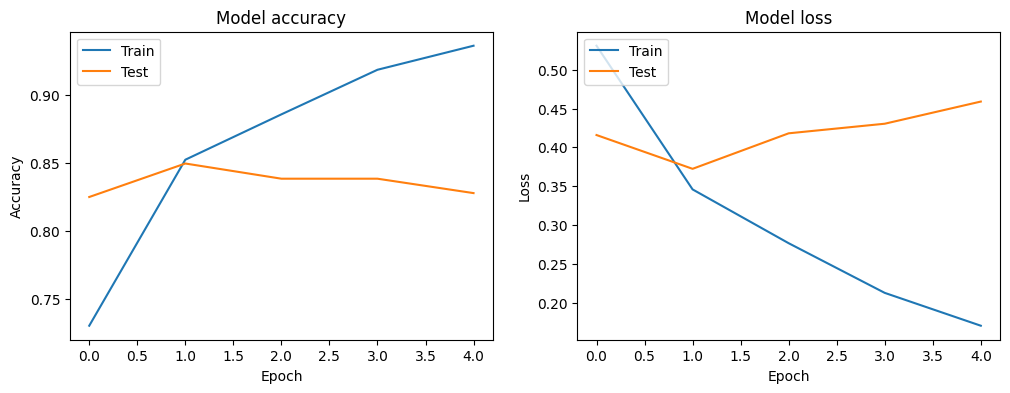

In [42]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [43]:
# Naive Bayes for comparison
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Vectorize the text
vectorizer = CountVectorizer()
X_nb = vectorizer.fit_transform(df['cleaned_text'])
y_nb = le.fit_transform(df['user_suggestion'])

# Train-test split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

# Evaluate Naive Bayes model
y_pred_nb = nb_model.predict(X_test_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test_nb, y_pred_nb))

# Compare with LSTM
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1473
           1       0.87      0.86      0.86      2026

    accuracy                           0.84      3499
   macro avg       0.84      0.84      0.84      3499
weighted avg       0.84      0.84      0.84      3499

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1473
           1       0.85      0.85      0.85      2026

    accuracy                           0.83      3499
   macro avg       0.82      0.82      0.82      3499
weighted avg       0.83      0.83      0.83      3499



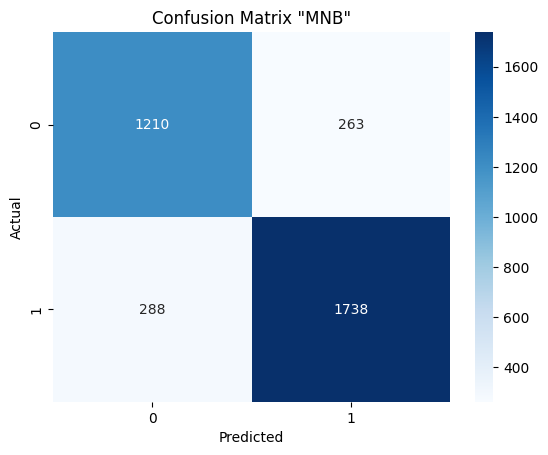

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_nb, y_pred_nb)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix "MNB"')
plt.show()


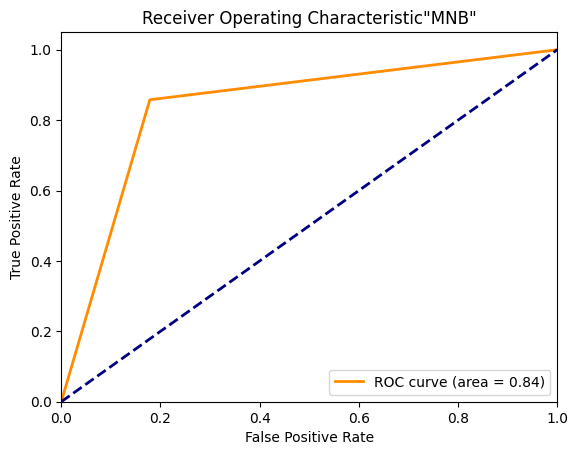

In [53]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_nb, y_pred_nb)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic"MNB"')
plt.legend(loc='lower right')
plt.show()


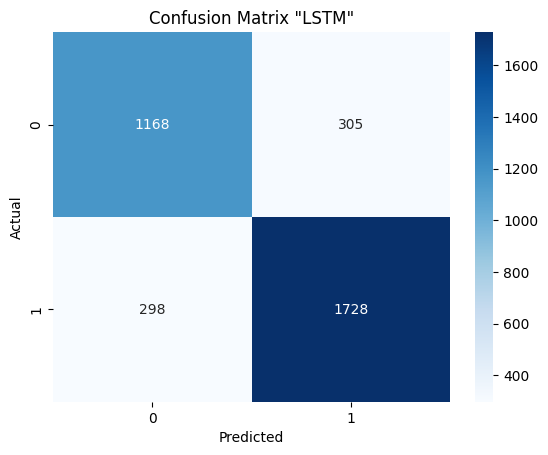

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix "LSTM"')
plt.show()

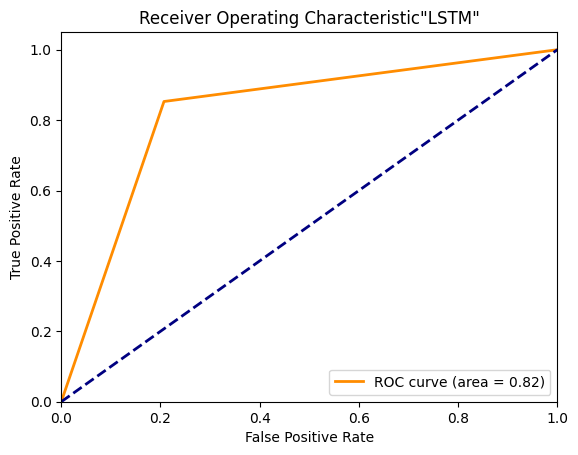

In [55]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic"LSTM"')
plt.legend(loc='lower right')
plt.show()


In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# K-fold cross-validation
kf = KFold(n_splits=2)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Train the LSTM model
    model.fit(X_train_cv, y_train_cv, epochs=5, batch_size=64, verbose=1)

    # Evaluate the model
    y_pred_cv = (model.predict(X_test_cv) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test_cv, y_pred_cv)
    accuracies.append(accuracy)

print(f"Cross-validated accuracy: {np.mean(accuracies):.4f}")


Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 534ms/step - accuracy: 0.9185 - loss: 0.2186
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 71s 457ms/step - accuracy: 0.9566 - loss: 0.1329
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 459ms/step - accuracy: 0.9688 - loss: 0.0973
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 454ms/step - accuracy: 0.9716 - loss: 0.0802
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 462ms/step - accuracy: 0.9709 - loss: 0.0823
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step
Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 451ms/step - accuracy: 0.8823 - loss: 0.3156
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 450ms/step - accuracy: 0.9472 - loss: 0.1562
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 452ms/step - accuracy: 0.9649 - loss: 0.1090
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - accuracy: 0.9822 - loss: 0.0591
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 454ms/step - accuracy: 0.9904 - loss: 0.0370
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step
Cross-validated accuracy: 0.9096

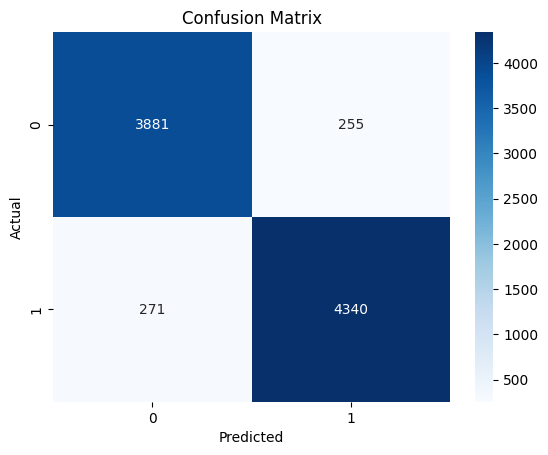

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_cv, y_pred_cv)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


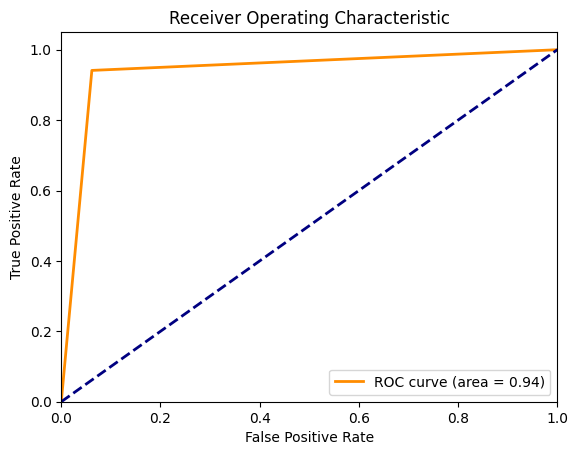

In [49]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred_cv)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, ClassifierMixin

# Convert LSTM predictions into the format needed for ensemble
class LSTMWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, tokenizer, max_len):
        self.model = model
        self.tokenizer = tokenizer
        self.max_len = max_len

    def fit(self, X, y):
        return self  # No fitting needed for this wrapper

    def predict(self, X):
        X_seq = self.tokenizer.texts_to_sequences(X)
        X_pad = pad_sequences(X_seq, maxlen=self.max_len)
        probs = self.model.predict(X_pad)
        return (probs > 0.5).astype("int32")  # Convert probabilities to class labels

    def predict_proba(self, X): # Add predict_proba method
        X_seq = self.tokenizer.texts_to_sequences(X)
        X_pad = pad_sequences(X_seq, maxlen=self.max_len)
        probs = self.model.predict(X_pad)  # Return probabilities for soft voting
        # Reshape probabilities to 2D for consistency with other estimators
        return np.column_stack([1 - probs, probs])

# Create pipelines for each model
nb_pipeline = make_pipeline(vectorizer, nb_model)
lstm_pipeline = make_pipeline(LSTMWrapper(model, tokenizer, max_len))  # Use the wrapper

# Ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_pipeline),
    ('lstm', lstm_pipeline)
], voting='soft')

# Train ensemble model
ensemble_model.fit(df['cleaned_text'], y)

# Evaluate ensemble model
y_pred_ensemble = ensemble_model.predict(df['cleaned_text'])
print("Ensemble Model Classification Report:")
print(classification_report(y, y_pred_ensemble))

547/547 ━━━━━━━━━━━━━━━━━━━━ 73s 134ms/step
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7526
           1       0.97      0.97      0.97      9968

    accuracy                           0.96     17494
   macro avg       0.96      0.96      0.96     17494
weighted avg       0.96      0.96      0.96     17494

